In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('./../data/Solar_Energy_Production.csv')
df.tail()

,name,id,address,date,kWh,public_url,installationDate,uid
258418,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2023/03/12 03:00:00 PM,201.285,https://monitoringpublic.solaredge.com/solared...,2017/10/31,5776502023-03-12 15:00:00
258419,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2023/03/12 04:00:00 PM,162.582,https://monitoringpublic.solaredge.com/solared...,2017/10/31,5776502023-03-12 16:00:00
258420,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2023/03/12 05:00:00 PM,107.060,https://monitoringpublic.solaredge.com/solared...,2017/10/31,5776502023-03-12 17:00:00
258421,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2023/03/12 06:00:00 PM,43.074,https://monitoringpublic.solaredge.com/solared...,2017/10/31,5776502023-03-12 18:00:00
258422,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2023/03/12 07:00:00 PM,1.788,https://monitoringpublic.solaredge.com/solared...,2017/10/31,5776502023-03-12 19:00:00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258423 entries, 0 to 258422
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              258423 non-null  object 
 1   id                258423 non-null  int64  
 2   address           258423 non-null  object 
 3   date              258423 non-null  object 
 4   kWh               258423 non-null  float64
 5   public_url        258423 non-null  object 
 6   installationDate  258423 non-null  object 
 7   uid               258423 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.8+ MB


In [15]:
df['name'].unique()

array(['Calgary Fire Hall Headquarters', 'Whitehorn Multi-Service Centre',
       'Southland Leisure Centre',
       'Hillhurst Sunnyside Community Association',
       'Glenmore Water Treatment Plant',
       'City of Calgary North Corporate Warehouse',
       'Richmond - Knob Hill Community Hall', 'Manchester Building M',
       'CFD Firehall #7', 'Telus Spark', 'Bearspaw Water Treatment Plant'],
      dtype=object)

In [38]:
# solar power production per site
counts = df.groupby('name')['kWh'].sum()
site_totals = pd.DataFrame(counts).sort_values(by='kWh', ascending=False)

site_totals

,kWh
name,
Bearspaw Water Treatment Plant,3082637.596
Whitehorn Multi-Service Centre,2558802.505
Glenmore Water Treatment Plant,1551177.716
Southland Leisure Centre,1147493.626
City of Calgary North Corporate Warehouse,768964.640
Hillhurst Sunnyside Community Association,186441.264
Manchester Building M,183243.243
CFD Firehall #7,170080.887
Calgary Fire Hall Headquarters,110211.611


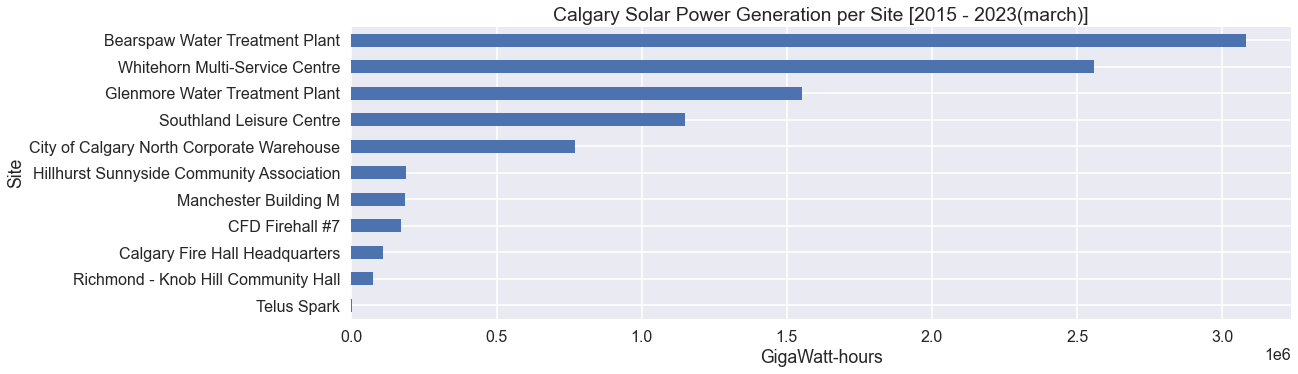

In [99]:
site_totals = site_totals.sort_values(by='kWh', ascending=True)
plt.style.use('seaborn-poster')

site_totals.plot(figsize=(15, 5), kind='barh', legend=False)
plt.title('Calgary Solar Power Generation per Site [2015 - 2023(march)]')
plt.xlabel('GigaWatt-hours')
plt.ylabel('Site')

plt.show()

In [83]:
df['date'].nunique()

36192

In [49]:
df['date'] = pd.to_datetime(df['date']) 

df_pw = df.drop(columns= ['name', 'id', 'address', 'public_url', 'installationDate', 'uid'])
df_pw.head() #= df_pw.set_index('date')

,date,kWh
0,2017-09-11 08:00:00,1.130
1,2017-09-11 09:00:00,2.340
2,2017-09-11 10:00:00,3.656
3,2017-09-11 11:00:00,4.577
4,2017-09-11 12:00:00,6.506


In [50]:
count_date = df_pw.groupby('date')['kWh'].sum()

pw_clean = pd.DataFrame(count_date)
pw_clean.head()

,kWh
date,
2015-09-01 14:30:00,27.805
2015-09-01 15:30:00,30.559
2015-09-01 16:30:00,23.613
2015-09-01 17:30:00,15.257
2015-09-01 18:30:00,7.896


In [51]:
pw_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36192 entries, 2015-09-01 14:30:00 to 2023-03-16 19:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     36192 non-null  float64
dtypes: float64(1)
memory usage: 565.5 KB


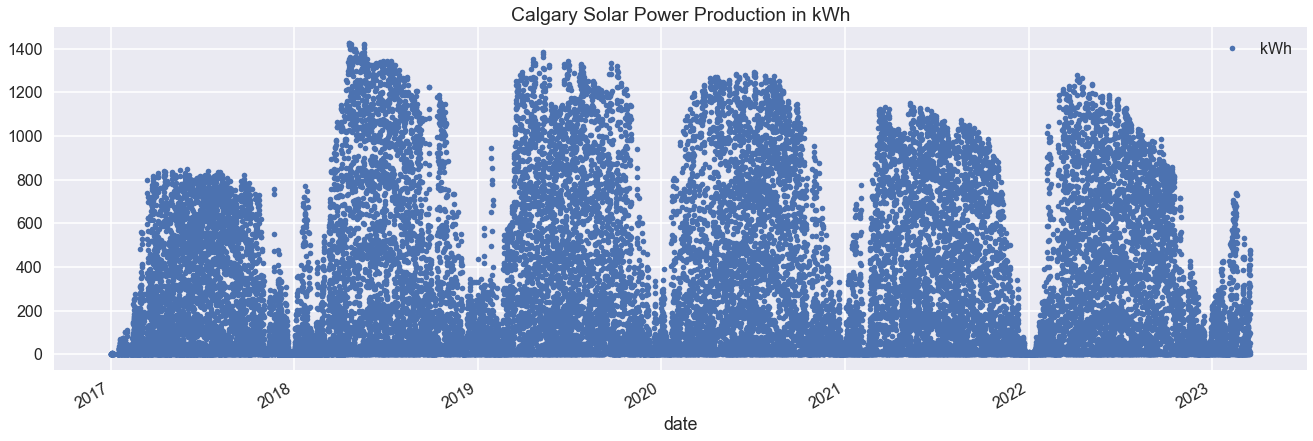

In [101]:
plt.style.use('seaborn-poster')
pw_clean.plot(style='.',
        figsize=(20, 7),
        title='Calgary Solar Power Production in kWh')
plt.show()

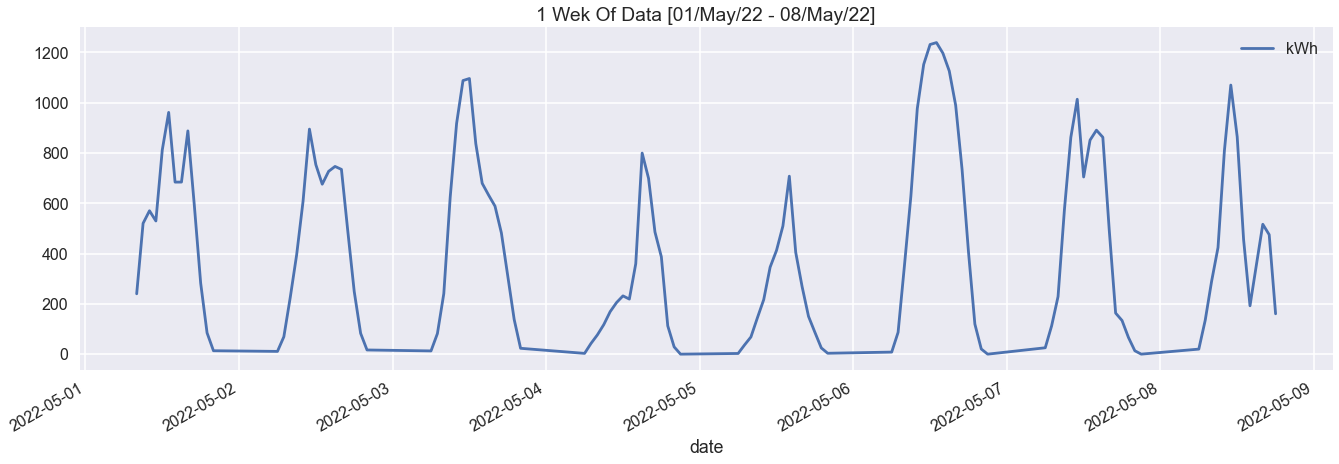

In [102]:
pw_clean.loc[(pw_clean.index > '05-01-2022 07:00:00') & (pw_clean.index < '05-08-2022 19:00:00')] \
    .plot(style='-', figsize=(20, 7), title='1 Wek Of Data [01/May/22 - 08/May/22]')
plt.show()

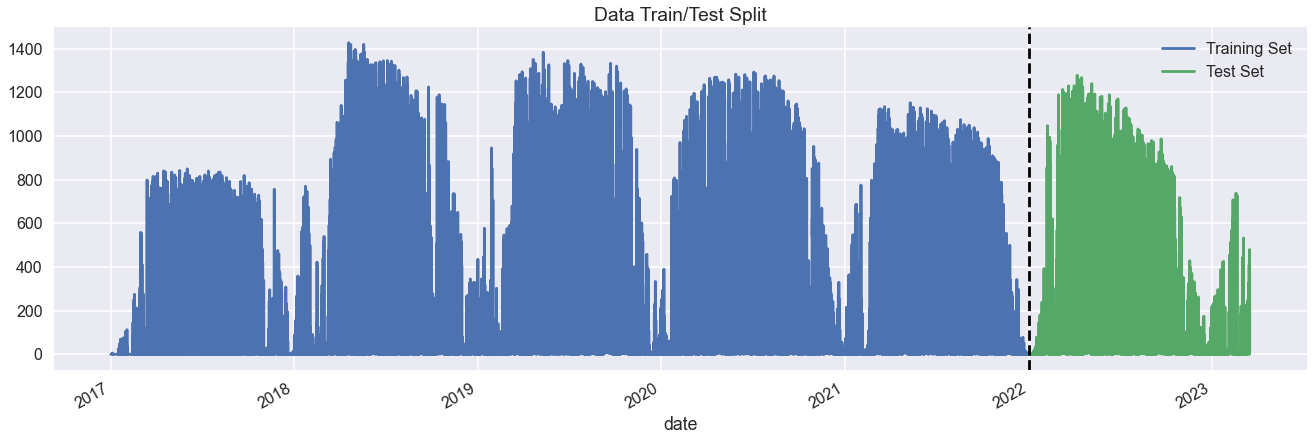

In [103]:
# remove data prior to 2017
pw_clean = pw_clean.loc[pw_clean.index >= '01-01-2017']

# test/train split
train = pw_clean.loc[pw_clean.index < '01-01-2022']
test = pw_clean.loc[pw_clean.index >= '01-01-2022']

fig, ax = plt.subplots(figsize=(20, 7))
train.plot(ax=ax, style='-', label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, style='-', label='Test Set')
ax.axvline('01-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

df_pw['hour'] = df_pw.index.hour
df_pw['dayofweek'] = df_pw.index.dayofweek
df_pw['quarter'] = df_pw.index.quarter
df_pw['month'] = df_pw.index.month
df_pw['year'] = df_pw.index.year
df_pw['dayofyear'] = df_pw.index.dayofyear
df_pw['dayofmonth'] = df_pw.index.day